In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
tf.enable_eager_execution()

This tutorial was about doing custom training instead of the higher-level keras API.

## Variables

In [3]:
x = tf.zeros([10,10])
x

<tf.Tensor: id=3, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [4]:
x += 2.0
x

<tf.Tensor: id=6, shape=(10, 10), dtype=float32, numpy=
array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]], dtype=float32)>

In [5]:
var1 = tfe.Variable(1.0)
var1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [6]:
var1.assign(3.0)
var1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [7]:
var1.assign(tf.square(var1))
var1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.0>

## Fitting a Linear Model

### Define Model

In [8]:
class LinearModel(object):
    def __init__(self):
        # IRL init to random values
        self.W = tfe.Variable(5.0)
        self.b = tfe.Variable(0.0)
    def __call__(self, x):
        return self.W * x + self.b

In [9]:
model = LinearModel()
model

In [10]:
model(3.0)

<tf.Tensor: id=44, shape=(), dtype=float32, numpy=15.0>

### Define Loss Function

In [11]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### Make Training Data

In [12]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_EXAMPLES = 1000

In [13]:
inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_B + noise
outputs[0:10]

<tf.Tensor: id=62, shape=(10,), dtype=float32, numpy=
array([-2.4293795 ,  3.5428753 ,  0.1371218 ,  0.62101007, -4.407132  ,
        5.513485  ,  0.755783  ,  5.2362576 ,  2.6254447 ,  0.05790552],
      dtype=float32)>

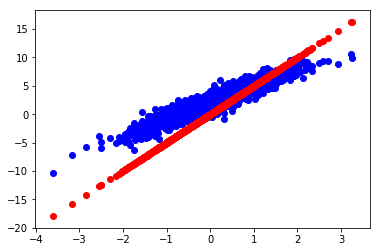

In [14]:
# plot truth
plt.scatter(inputs, outputs, c='b')
# plot current model
plt.scatter(inputs, model(inputs), c='r')
plt.show()

In [15]:
# current loss
loss(model(inputs), outputs)

<tf.Tensor: id=127, shape=(), dtype=float32, numpy=8.834029>

### Training Loop

In [16]:
def train(model, inputs, outputs, learning_rate):
    
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.W, model.b])
    
    model.W.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [17]:
model = LinearModel()
model

In [18]:
w_list, b_list = [], []

epochs = range(10)
for e in epochs:
    
    w_list.append(model.W.numpy())
    b_list.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, 0.1)

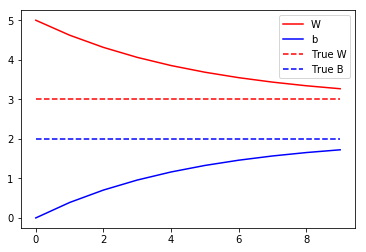

In [19]:
plt.plot(epochs, w_list, 'r', epochs, b_list, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_B] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True B'])
plt.show()